In [1]:
%run jupyterutils.py

from logistic_regression.LogisticRegression import LogisticRegression

### Linear Regression with multiple feature
We attempt to try and mimic linear regression and than test it , to test our implementations correctness we would generate the data set using a perfect linear equation , we will than compare how good our algorithm does when it get's data fitting a curve whose mathematically model is known. Run time and correctness might be good KPI for monitoring .



##### Create data

We'll check how good is the algorithm in finding the actual parameters when we feed it absolutely ideal data

In [2]:
def ModelEquation(x1):
    return 9.8*x1 + 7.6

In [3]:
x1 = sp.Symbol('x1')

expr = ModelEquation(x1)
sp.pprint(expr)

9.8⋅x₁ + 7.6


In [4]:
total_data_points = 50000
x1 = np.random.normal(0.5, 0.2, size=25000)
x2 = np.random.normal(1.5, 0.2, size=25000)
x = np.concatenate([x1, x2])
np.random.shuffle(x)
probabs = ModelEquation(x)
threshold = np.median(probabs)
y = LogisticRegression.getLabelFromProbability(ModelEquation(x),threshold)

perm = np.random.permutation(len(x))
x = x[perm]
y = y[perm]


print("Label distribution:", np.bincount(y))


Label distribution: [25000 25000]


##### Split data

We're going to split the data into training and testing data based on a tuneable parameter

In [5]:
training_percent = 0.85
training_numbers = int(training_percent*total_data_points)

training_features = np.array([x[:training_numbers]]).T
training_labels = np.array(y[:training_numbers])

testing_attributes=np.array([x[training_numbers:]]).T
testing_labels=np.array(y[training_numbers:])

print(training_features.shape)
print(testing_attributes.shape)
print(training_labels.shape)
print(testing_labels.shape)

(42500, 1)
(7500, 1)
(42500,)
(7500,)


##### Model Training

Iteration  0  weights  [[0.84681037]]  bias  -0.00019270890537447525 loss 0.590891690173734
Iteration  1000  weights  [[0.8688413]]  bias  -0.17570462471597886 loss 0.5594383956516351
Iteration  2000  weights  [[0.91415301]]  bias  -0.3236441840473111 loss 0.5354226214420893
Iteration  3000  weights  [[0.97413954]]  bias  -0.4522595368644614 loss 0.5152482630539325
Iteration  4000  weights  [[1.04275875]]  bias  -0.5673509915796041 loss 0.4972783286009677
Iteration  5000  weights  [[1.11602448]]  bias  -0.6728034260281495 loss 0.4807828871215419
Iteration  6000  weights  [[1.19140068]]  bias  -0.7711639767748235 loss 0.4654224880023604
Iteration  7000  weights  [[1.26731227]]  bias  -0.8640951809540585 loss 0.45102111109834636
Iteration  8000  weights  [[1.34280062]]  bias  -0.9526901773773649 loss 0.4374716101235229
Iteration  9000  weights  [[1.41729554]]  bias  -1.0376799940852124 loss 0.4246972536797447
Iteration  10000  weights  [[1.49046928]]  bias  -1.1195660689002946 loss 0.412

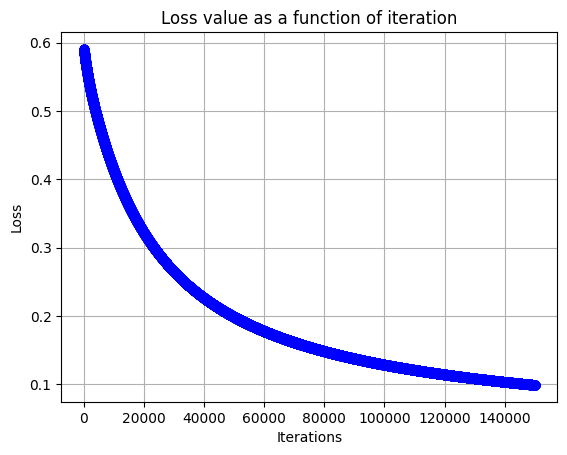

In [6]:
model = LogisticRegression(training_features, training_labels , learning_rate=0.001, threshold=0.5)
model.train(150000,True)

values = model.trainingLoss
x = np.arange(1, len(values) + 1)

plotLineGraph("Iterations", "Loss", "Loss value as a function of iteration",x,values)


#### Prediction Details

In [7]:
print("Predicted weights ", model.weight, " bias ", model.bias)

actual = testing_labels.reshape(-1, 1)  # ensure shape = (n_samples, 1)
probs = LogisticRegression.sigmoidFunction(np.dot(testing_attributes, model.weight) + model.bias)
loss = model.calculateBinaryCrossEntropyLoss(actual, probs)

print("Prediction loss", loss)

Predicted weights  [[5.57963445]]  bias  -5.38592845402318
Prediction loss 0.09770746858994751
